In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Desi\anaconda3\envs\iclab_gpio\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Desi\anaconda3\envs\iclab_gpio\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Desi\anaconda3\envs\iclab_gpio\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Sample - 10 mL

In [304]:
mM20 = pd.Series([0.23924,0.23937,0.23946,0.23967,0.23961,0.23969,0.23971,0.23984,0.23988,
0.23974,0.24,0.24003,0.2401,0.24016,0.24021,0.24025,0.24032,0.24031,0.24046,
0.24042,0.24049,0.24052,0.24055,0.24059,0.24059,0.24067,0.2408,0.24085,0.24095,0.24095
])

mM40 = pd.Series([0.25965,0.25936,0.25917,0.25893,0.25893,0.25888,0.25891,0.25875,0.25876,
0.25868,0.25867,0.25864,0.2584,0.25857,0.25853,0.25851,0.25851,0.25852,0.25852,
0.25857,0.25859,0.25869,0.25869,0.2587,0.2587,0.25875,0.25883,0.25872,0.25872,
0.25878
])

mM80 = pd.Series([0.27531,0.27506,0.27482,0.27479,0.27475,0.27463,0.27468,0.27448,0.27444,
0.27441,0.27433,0.27423,0.27418,0.27412,0.27401,0.27402,0.27402,0.27403,0.27407,
0.27403,0.27403,0.27404,0.27407,0.27406,0.27404,0.27402,0.27401,0.274,0.27397,
0.27396])

mM160 = pd.Series([0.29099,0.29076,0.29079,0.29063,0.2906,0.2905,0.29042,0.29033,0.29023,0.29014,
0.29007,0.28997,0.28989,0.28981,0.28977,0.28968,0.28965,0.28958,0.28953,0.28947,
0.28948,0.28942,0.28938,0.28934,0.28929,0.28924,0.2892,0.28917,0.28913,0.28909
])

In [305]:
values = pd.DataFrame(data = pd.concat([mM20,mM40,mM80,mM160])*1000, columns = ["values_10mL [mV]"])
values['mM'] = pd.concat([pd.Series(20*np.ones(30)),pd.Series(40*np.ones(30)),pd.Series(80*np.ones(30)),pd.Series(160*np.ones(30))])
values['time [s]'] = 2*np.arange(120)

In [306]:
values

,values_10mL [mV],mM,time [s]
0,239.24,20.0,0
1,239.37,20.0,2
2,239.46,20.0,4
3,239.67,20.0,6
4,239.61,20.0,8
...,...,...,...
25,289.24,160.0,230
26,289.20,160.0,232
27,289.17,160.0,234
28,289.13,160.0,236


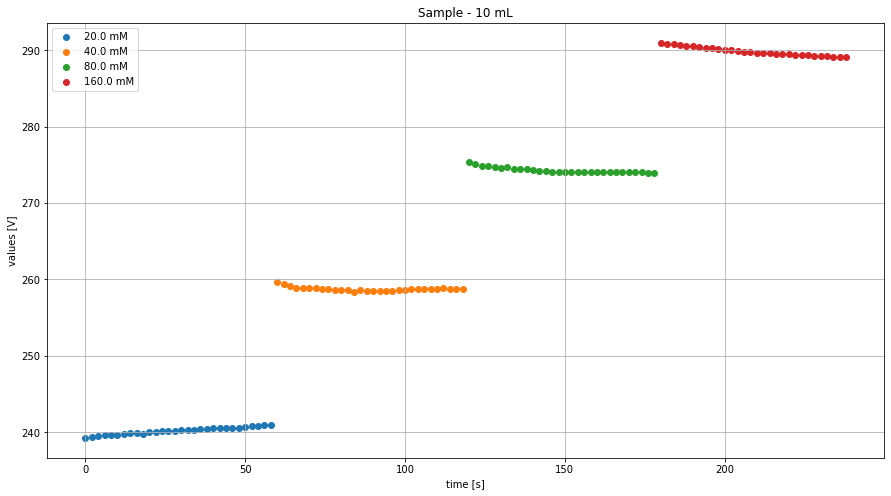

In [307]:
plt.figure(figsize=(15,8))
avg = []
std = []
for subgroup, group in values.groupby('mM'):
    plt.scatter(group['time [s]'], group["values_10mL [mV]"], label=str(group['mM'][0])+' mM')
    avg.append(round(group["values_10mL [mV]"].mean(),5))
    std.append(round(group["values_10mL [mV]"].std(),5))

# Aggiungere la legenda
plt.legend()

# Aggiungere etichette agli assi
plt.xlabel('time [s]')
plt.ylabel('values [V]')
plt.title("Sample - 10 mL")
# Mostrare il grafico
plt.grid()
plt.show()


In [343]:
delta_1 = pd.DataFrame(data = [["20-40", "40-80", "80-160"],np.diff(avg)], index = ['mM', 'Delta [mV]']).transpose()
delta_1

,mM,Delta [mV]
0,20-40,18.57333
1,40-80,15.53267
2,80-160,15.56467


In [344]:
pd.DataFrame(data = [["20", "40", "80", "160"],std, avg], index = ['mM', 'std [mV]', 'avg [mV]']).transpose()

,mM,std [mV],avg [mV]
0,20,0.4802,240.181
1,40,0.26211,258.75433
2,80,0.36723,274.287
3,160,0.56687,289.85167


## First Trial - Sample 10 mL

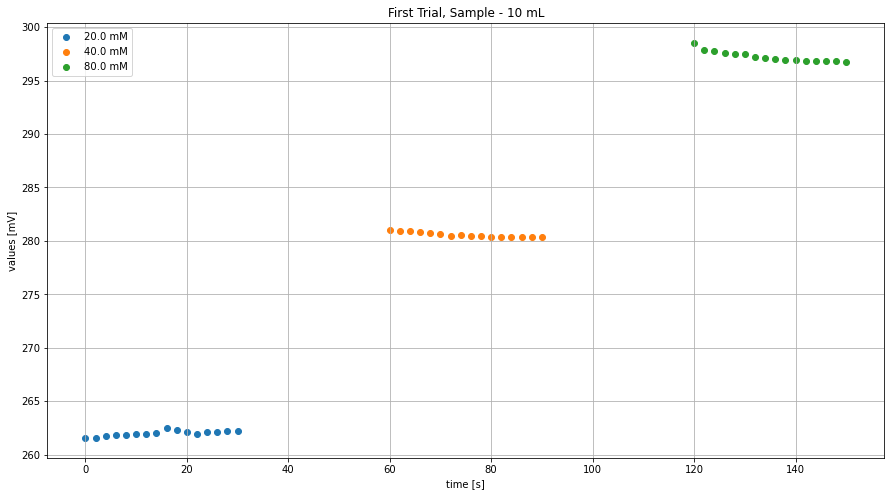

In [310]:
# First trial

FT20mM = pd.Series([0.26155,0.26159,0.2617,0.26179,0.26185,0.26189,0.26189,0.262,0.26245,0.2623,0.26214,0.26197,0.26213,0.2621,0.26221,0.26217])*1000
FT40mM = pd.Series([0.28101,0.28093,0.28093,0.28081,0.28071,0.28064,0.2805,0.28051,0.28046,0.28042,0.28041,0.2804,0.28039,0.28039,0.28037,0.28035])*1000
FT80mM = pd.Series([29.855,29.79,29.773,29.759,29.75,29.753,29.724,29.715,29.706,29.697,29.691,29.686,29.683,29.68,29.68,29.672])*10

FTvalues = pd.DataFrame(data = pd.concat([FT20mM,FT40mM,FT80mM]), columns = ['FTvalues_10mL [mV]'])
FTvalues['mM'] = pd.concat([pd.Series(20*np.ones(16)),pd.Series(40*np.ones(16)),pd.Series(80*np.ones(16))])
FTvalues['time [s]'] = pd.concat([pd.Series(2*np.arange(16)), pd.Series(60+2*np.arange(16)), pd.Series(120+2*np.arange(16))])

plt.figure(figsize=(15,8))
FT_avg = []
FT_std = []
for subgroup, group in FTvalues.groupby('mM'):
    plt.scatter(group['time [s]'], group['FTvalues_10mL [mV]'], label=str(group['mM'][0])+' mM')
    FT_avg.append(round(group['FTvalues_10mL [mV]'].mean(),5))
    FT_std.append(round(group['FTvalues_10mL [mV]'].std(),5))
    
# Aggiungere la legenda
plt.legend()

# Aggiungere etichette agli assi
plt.xlabel('time [s]')
plt.ylabel('values [mV]')
plt.title("First Trial, Sample - 10 mL")
# Mostrare il grafico
plt.grid()
plt.show()


In [342]:
deltaFT = pd.DataFrame(data = [["20-40", "40-80"],np.diff(FT_avg)], index = ['mM', 'Delta [mV]']).transpose()
deltaFT

,mM,Delta [mV]
0,20-40,18.59375
1,40-80,16.68188


# Sample 25 mg

In [312]:
SecmM20 = pd.Series([0.15102,0.15104,0.1505,0.15103,0.15108,0.15109,0.15114,0.15113,0.15114,0.15117,0.15117,0.15119,0.15121,
0.15122,0.15122,0.15129,0.15131,0.15132,0.15132,0.151345,0.15134,0.15137,0.15139,0.1514,0.15142,0.1514,0.1515,0.15151,0.1514,0.15143])
SecmM40 = pd.Series([0.1715,0.17032,0.17022,0.17024,0.17023,0.16988,0.17018,0.17003,0.17002,0.17004,0.16985,0.16997,0.17002,0.16992,
0.16991,0.16984,0.1699,0.16999,0.16992,0.16992,0.16997,0.17002,0.17002,0.17,0.17001,0.17005,0.17003,0.17002,0.17,0.16997])
SecmM80 = pd.Series([0.18793,0.18773,0.18745,0.18747,0.18744,0.18732,0.18726,0.18711,0.18726,0.187,0.18685,0.1868,0.1867,0.18691,0.18669,0.18656,
0.18653,0.1865,0.18646,0.18649,0.18643,0.1864,0.18639,0.18636,0.18634,0.18631,0.18626,0.18624,0.18619,0.18624])
SecmM160 = pd.Series([0.20333,0.20266,0.20261,0.20259,0.20254,0.20252,0.20247,0.20239,0.20241,0.20227,0.2022,0.20217,0.20211,0.2021,0.20211,
0.20202,0.202,0.20199,0.20198,0.20196,0.20198,0.20198,0.20199,0.202,0.20201,0.20201,0.202,0.20199,0.20202,0.20202])

In [313]:
Sec_values = pd.DataFrame(data = pd.concat([SecmM20,SecmM40,SecmM80,SecmM160])*1000, columns = ['values_25mL [mV]'])
Sec_values['mM'] = pd.concat([pd.Series(20*np.ones(30)),pd.Series(40*np.ones(30)),pd.Series(80*np.ones(30)),pd.Series(160*np.ones(30))])
Sec_values['time [s]'] = 2*np.arange(120)

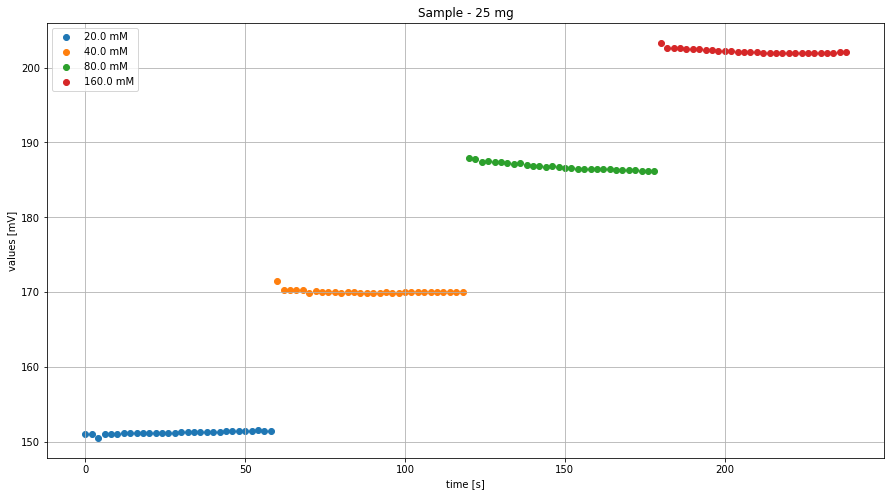

In [314]:
plt.figure(figsize=(15,8))
Sec_avg = []
Sec_std = []
for subgroup, group in Sec_values.groupby('mM'):
    plt.scatter(group['time [s]'], group['values_25mL [mV]'], label=str(group['mM'][0])+' mM')
    Sec_avg.append(round(group['values_25mL [mV]'].mean(),5))
    Sec_std.append(round(group['values_25mL [mV]'].std(),5))
    
# Aggiungere la legenda
plt.legend()

# Aggiungere etichette agli assi
plt.xlabel('time [s]')
plt.ylabel('values [mV]')
plt.title("Sample - 25 mg")
# Mostrare il grafico
plt.grid()
plt.show()


In [315]:
delta_2 = pd.DataFrame(data = [["20-40", "40-80", "80-160"],np.diff(Sec_avg)], index = ['mM', 'Delta [mV]']).transpose()
delta_2

,mM,Delta [mV]
0,20-40,18.82983
1,40-80,16.721
2,80-160,15.427


In [316]:
print("std [mV]:")
pd.DataFrame(data = [["20", "40", "80", "160"],Sec_std, Sec_avg], index = ['mM', 'std [mV]', 'avg [mV]']).transpose()

std [mV]:


,mM,std [mV],avg [mV]
0,20,0.1983,151.2365
1,40,0.29492,170.06633
2,80,0.49542,186.78733
3,160,0.3124,202.21433


In [317]:
#postprocessing

In [318]:
values.to_csv(r'C:\Users\Desi\Desktop\TesiStanford\df10_25mL.csv')

In [319]:
values = values.merge(Sec_values, on = ['time [s]','mM']).merge(FTvalues.drop(columns = 'mM'), on = 'time [s]', how = 'outer')
values

,values_10mL [mV],mM,time [s],values_25mL [mV],FTvalues_10mL [mV]
0,239.24,20.0,0,151.02,261.55
1,239.37,20.0,2,151.04,261.59
2,239.46,20.0,4,150.50,261.70
3,239.67,20.0,6,151.03,261.79
4,239.61,20.0,8,151.08,261.85
...,...,...,...,...,...
115,289.24,160.0,230,202.01,NaN
116,289.20,160.0,232,202.00,NaN
117,289.17,160.0,234,201.99,NaN
118,289.13,160.0,236,202.02,NaN


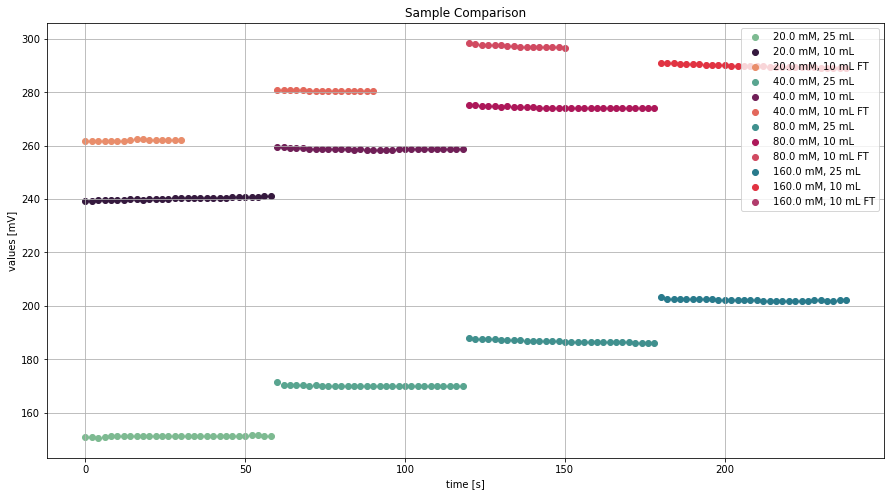

In [335]:
plt.figure(figsize=(15,8))
Sec_avg = []
Sec_std = []
values = values.reset_index(drop = True)
col1 = sns.color_palette("rocket")
col3 = sns.color_palette("flare")
col2 = sns.color_palette("crest")
for i, [_,group] in enumerate(values.groupby('mM')):
    plt.scatter(group['time [s]'], group['values_25mL [mV]'], label=str(group['mM'].iloc[0])+' mM, 25 mL', color = col2[i])
    plt.scatter(group['time [s]'], group['values_10mL [mV]'], label=str(group['mM'].iloc[0])+' mM, 10 mL', color = col1[i])
    plt.scatter(group['time [s]'], group['FTvalues_10mL [mV]'], label=str(group['mM'].iloc[0])+' mM, 10 mL FT', color = col3[i])
# Aggiungere la legenda
plt.legend(loc = 1)

# Aggiungere etichette agli assi
plt.xlabel('time [s]')
plt.ylabel('values [mV]')
plt.title("Sample Comparison")
# Mostrare il grafico
plt.grid()
plt.show()


In [338]:
values.set_index(['time [s]','mM'])

,,values_10mL [mV],values_25mL [mV],FTvalues_10mL [mV]
time [s],mM,,,
0,20.0,239.24,151.02,261.55
2,20.0,239.37,151.04,261.59
4,20.0,239.46,150.50,261.70
6,20.0,239.67,151.03,261.79
8,20.0,239.61,151.08,261.85
...,...,...,...,...
230,160.0,289.24,202.01,NaN
232,160.0,289.20,202.00,NaN
234,160.0,289.17,201.99,NaN


<AxesSubplot:xlabel='mM', ylabel='values_25mL [mV]'>

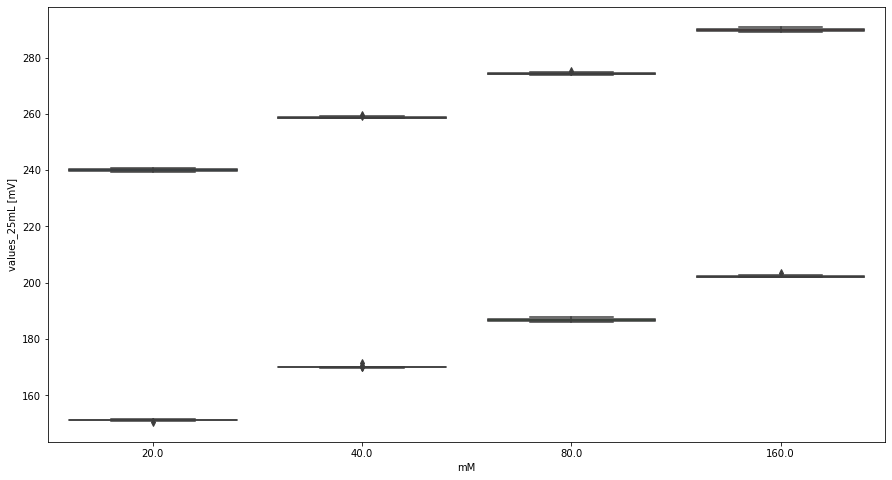

In [136]:
plt.figure(figsize=(15,8))
sns.boxplot(data=values, x="mM", y="values_10mL [mV]")
sns.boxplot(data=values, x="mM", y="values_25mL [mV]")

In [340]:
delta_1

,mM,Delta [V]
0,20-40,18.57333
1,40-80,15.53267
2,80-160,15.56467


Text(0, 0.5, '[mV]')

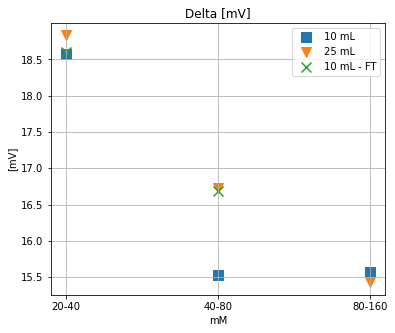

In [348]:
plt.figure(figsize=(6,5))
plt.scatter(delta_1['mM'], delta_1['Delta [mV]'], label='10 mL', marker = "s", s = 100)
plt.scatter(delta_2['mM'], delta_2['Delta [mV]'], label='25 mL', marker = 'v', s = 100)
plt.scatter(deltaFT['mM'], deltaFT['Delta [mV]'], label='10 mL - FT', marker = 'x', s = 100)
plt.legend()
plt.title('Delta [mV]')
plt.xlabel('mM')
plt.grid()
plt.ylabel('[mV]')